In [544]:
from datetime import datetime 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

In [486]:
tickers = pd.read_csv('../survivorship-free/data/tickers.csv', header=None)[1].tolist()
tickers

['AAPL',
 'XOM',
 'GEC',
 'GOOGL',
 'CVX',
 'T',
 'IBM',
 'PFE',
 'BRK_B',
 'JNJ',
 'WFC',
 'MSFT',
 'PM',
 'PG',
 'KO',
 'VZ',
 'WMT',
 'PEP',
 'JPM',
 'CSCO',
 'CMCSA',
 'INCO',
 'HD',
 'MCD',
 'MRK',
 'V',
 'ORCL',
 'UTX',
 'C',
 'COP',
 'BAC',
 'OXY',
 'GILD',
 'AEC',
 'QCOM',
 'UPS',
 'MA',
 'UNH',
 'ABT',
 'SLB',
 'BA',
 'LPRAX',
 'DIS',
 'KTF',
 'DUK',
 'AMZN',
 'EMC',
 'F',
 'COST',
 'LOW',
 'AMGN',
 'SBUX',
 'MO',
 'APC',
 'NKE',
 'MMM',
 'PSX',
 'GS',
 'SO',
 'MET',
 'UNP',
 'HAL',
 'USB',
 'DOW',
 'CVS',
 'BAX',
 'EBAY',
 'KMB',
 'BMY',
 'DE',
 'EOG',
 'CAT',
 'PX',
 'TJX',
 'ABBV',
 'BK',
 'NWSA',
 'AMT',
 'AIG',
 'COP',
 'LLY',
 'BLK',
 'GIS',
 'ALD',
 'COF',
 'YUM',
 'MON',
 'ETN',
 'VIAB',
 'TMO',
 'CL',
 'STT',
 'TWX',
 'ITW',
 'PRU',
 'SPG',
 'MRO',
 'CSX',
 'AFL',
 'WMB',
 'KHC',
 'ACN',
 'NSC',
 'ESRX',
 'CTSH',
 'MDT',
 'GD',
 'DD',
 'ALL',
 'CRM',
 'CELG',
 'PSA',
 'CTL',
 'EMR',
 'ADM',
 'TGT',
 'VTR',
 'CMI',
 'DELL',
 'ISRG',
 'HPQ',
 'MMC',
 'ECL',
 'BIIB',
 'H

In [487]:
def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = stats.linregress(x, returns)
    m = ((1 + slope) ** 252) * (rvalue ** 2)
#     print(m)
    return m

In [488]:
stocks = (
    (pd.concat(
        [pd.read_csv(f"../survivorship-free/data/{ticker}.csv", index_col='date', parse_dates=True)[
            'close'
        ].rename(ticker)
        for ticker in tickers],
        axis=1,
        sort=True)
    )
)

stocks = stocks.loc[:,~stocks.columns.duplicated()]

In [489]:
stocks.head()

,AAPL,XOM,GEC,GOOGL,CVX,T,IBM,PFE,BRK_B,JNJ,...,ANDV,Q,BHF,DWDP,CDNS,TPR,NCLH,IQV,APTV,HII
date,,,,,,,,,,,,,,,,,,,,,
2013-02-28,NaN,76.713411,24.240000,401.840443,98.147924,28.104563,173.474505,23.138993,102.16,66.706773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-01,NaN,76.610613,24.360001,404.343169,97.938475,28.182827,175.271183,23.155901,102.05,67.223879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-04,NaN,76.199418,24.600000,412.023878,98.432775,28.355007,177.240620,23.409525,101.95,67.662105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-05,NaN,76.764810,25.440001,420.600353,98.801406,28.644583,178.398095,23.730783,102.66,68.065273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-06,NaN,76.721978,25.080000,416.977169,99.253816,28.401965,179.996103,23.773053,103.24,67.828631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [490]:
momentums = stocks.copy(deep=True)

for ticker in tickers:
    momentums[ticker] = stocks[ticker].rolling(90).apply(momentum, raw=False)

In [581]:
bests = momentums.max().sort_values(ascending=False).index[:5]
bests

Index(['FCX', 'OKE', 'SWN', 'MUR', 'FRX'], dtype='object')

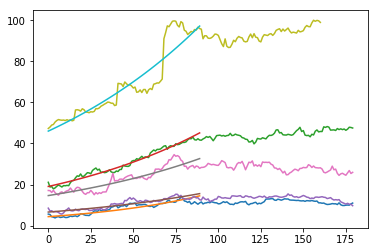

In [586]:
for best in bests:
    end = momentums[best].index.get_loc(momentums[best].idxmax())
    start = end - 90
    start, end
    rets = np.log(stocks[best].iloc[start:end])
    if len(rets):
        x = np.arange(len(rets))
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, rets)
        plt.plot(np.arange(len(stocks[best][start:end+90])), stocks[best][start:end+90])
        plt.plot(x, np.e ** (intercept + slope*x))

In [587]:
import backtrader as bt
import numpy as np
from scipy import stats

<IPython.core.display.Javascript object>


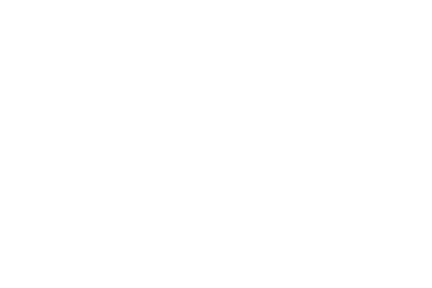

[[<Figure size 432x288 with 1 Axes>]]

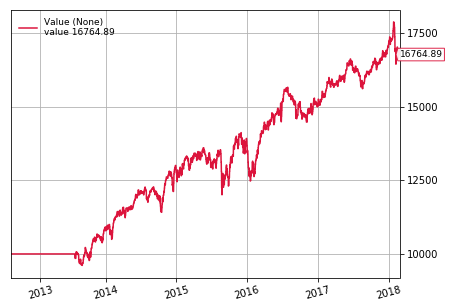

In [588]:
class Momentum(bt.Indicator):
    lines = ('trend',)
    params = (('period', 90),)
    
    def __init__(self):
        self.addminperiod(self.params.period)
    
    def next(self):
        returns = np.log(self.data.get(size=self.p.period))
        x = np.arange(len(returns))
        slope, _, rvalue, _, _ = stats.linregress(x, returns)
        annualized = (1 + slope) ** 252
        self.lines.trend[0] = annualized * (rvalue ** 2)
        
        
class Test(bt.Strategy):
    def __init__(self):
        self.i = 0
        self.inds = {}
        self.spy = self.datas[0]
        self.stocks = self.datas[1:]
        
        self.spy_sma200 = bt.indicators.SimpleMovingAverage(self.spy.close,
                                                            period=200)
        
        for d in self.stocks:
            self.inds[d] = {}
            self.inds[d]["momentum"] = Momentum(d.close, 
                                                period=90)
            self.inds[d]["sma100"] = bt.indicators.SimpleMovingAverage(d.close, 
                                                                       period=100)
            self.inds[d]["atr20"] = bt.indicators.ATR(d, 
                                                      period=20)

    def prenext(self):
        # call next() even when data is not available for all tickers
        self.next()
    
    def next(self):
        if self.i % 5 == 0:
            self.rebalance_portfolio()
        if self.i % 10 == 0:
            self.rebalance_positions()
        self.i += 1
    
    def rebalance_portfolio(self):
        # only look at data that we can have indicators for 
        self.rankings = list(filter(lambda d: len(d) > 100, self.stocks))
        self.rankings.sort(key=lambda d: self.inds[d]["momentum"][0])
        num_stocks = len(self.rankings)
        
        # sell stocks based on criteria
        for i, d in enumerate(self.rankings):
            if self.getposition(self.data).size:
                if i > num_stocks * 0.2 or d < self.inds[d]["sma100"]:
                    self.close(d)
        
        if self.spy < self.spy_sma200:
            return
        
        # buy stocks with remaining cash
        for i, d in enumerate(self.rankings[:int(num_stocks * 0.2)]):
            cash = self.broker.get_cash()
            value = self.broker.get_value()
            if cash <= 0:
                break
            if not self.getposition(self.data).size:
                size = value * 0.001 / self.inds[d]["atr20"]
                self.buy(d, size=size)
                
        
    def rebalance_positions(self):
        num_stocks = len(self.rankings)
        
        if self.spy < self.spy_sma200:
            return

        # rebalance all stocks
        for i, d in enumerate(self.rankings[:int(num_stocks * 0.2)]):
            cash = self.broker.get_cash()
            value = self.broker.get_value()
            if cash <= 0:
                break
            size = value * 0.001 / self.inds[d]["atr20"]
            self.order_target_size(d, size)
            
            
            
cerebro = bt.Cerebro(stdstats=False)
cerebro.broker.set_coc(True)

start = datetime(2012,2,28)
end = datetime(2018,2,28)

spy = bt.feeds.YahooFinanceData(dataname='SPY',
                                 fromdate=start,
                                 todate=end,
                                 plot=False)

cerebro.adddata(spy)

for ticker in tickers:
    df = pd.read_csv(f"../survivorship-free/data/{ticker}.csv",
                     parse_dates=True,
                     index_col=0)
    if len(df) > 100:
        cerebro.adddata(bt.feeds.PandasData(dataname=df, plot=False))

cerebro.broker.setcash(10_000)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addstrategy(Test)
results = cerebro.run()
cerebro.plot()      

In [589]:
results[0].analyzers.sharperatio.get_analysis()

OrderedDict([('sharperatio', 1.2693941838183564)])

In [590]:
results[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', 0.5167017661196978),
             ('ravg', 0.0003417339723013874),
             ('rnorm', 0.0899338006193354),
             ('rnorm100', 8.99338006193354)])

In [591]:
results[0].analyzers.drawdown.get_analysis()

AutoOrderedDict([('len', 41),
                 ('drawdown', 6.194881889286971),
                 ('moneydown', 1107.151930890057),
                 ('max',
                  AutoOrderedDict([('len', 278),
                                   ('drawdown', 11.709628666036293),
                                   ('moneydown', 1639.5415283243092)]))])